In [1]:
#Loading important libraries
import numpy as np
import pandas as pd

from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *
import pydicom

Get DICOM files into path by using **get_dicom_files** 

In [2]:
items = get_dicom_files('../input/siim-covid19-detection/train', recurse = True)
print (items)

[Path('../input/siim-covid19-detection/train/cd5dd5e6f3f5/b2ee36aa2df5/d8ba599611e5.dcm'), Path('../input/siim-covid19-detection/train/49358afcfb80/60a49211f5df/29b23a11d1e4.dcm'), Path('../input/siim-covid19-detection/train/e4b50e7402c3/59f646771321/8174f49500a5.dcm'), Path('../input/siim-covid19-detection/train/e4b50e7402c3/d289a11b2e85/d54f6204b044.dcm'), Path('../input/siim-covid19-detection/train/92aad2d01be8/60fe0c912619/d51cadde8626.dcm'), Path('../input/siim-covid19-detection/train/b524c80e729a/2702319e5a1d/47d014f9055a.dcm'), Path('../input/siim-covid19-detection/train/3927f0e451cc/d5d5b1c75389/89fd7f185d77.dcm'), Path('../input/siim-covid19-detection/train/ba27bcbd6881/09fb8b5e1ce8/7c40e04c6163.dcm'), Path('../input/siim-covid19-detection/train/ba27bcbd6881/d300cb010b90/6a93346150a4.dcm'), Path('../input/siim-covid19-detection/train/e38bf848a4b2/e16ffae4da8c/5b687c54d3fd.dcm'), Path('../input/siim-covid19-detection/train/e7c4f060e6d4/9ed54c169ae1/be917938214c.dcm'), Path('../

fastai.medical.imaging uses pydicom.dcmread to read DICOM file. I specify the path from **items** and call **.dcmread**

In [3]:
dcm = items[0]
DCM = dcm.dcmread()
DCM

Dataset.file_meta -------------------------------
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113654.2.70.1.148769649048957664597984588271197617802
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: 71228e4340de
(0008, 0018) SOP Instance UID                    UI: d8ba599611e5
(0008, 0020) Study Date                          DA: '837af68926b7'
(0008, 0030) Study Time                          TM: '81c1a714dbda'
(0008, 0050) Accession Number                    SH: 'c4aef4fc15a2'
(0008, 0060) Modality                            CS: 'DX'
(0009, 0010) Private Creator                     LO: 'GEIIS'
(0010, 0

# **Some key pointers on the tag information above**

**Pixel Data**(7fe0, 0010)- This is where the raw pixel data is stored. Pydicom uses the pixel data (Array of 13249792 elements) to an image.

**Phtometric interpretation**(0028, 0004) - a.k.a colour space. In this file it is 'MONOCHROME1'. It indicates that grayscale ranges from bright to dark with ascending pixel values.

**Samples per Pixel**(0028,0002) - Number of samples (planes) in the image.It is should be 1 for this image because it is monochrome.

**Bits stored**(0028,0101) - Number of bits stored for each pixel sample data.

We may need this meta-data in future analysis. 

https://www.dicomlibrary.com/dicom/dicom-tags/ have complete details about DICOM headers.

The DICOM file consists of image information as **pixel data**. We have to convert the pixel array into a tensor.

In [4]:
# Extracting the pixel data as an array
x =DCM.pixel_array,DCM.pixel_array.shape
print (x)
# Converting the pixel array into tensor using TensorDicom
tdm = TensorDicom(DCM.pixel_array)
tdm

(array([[25181, 25151, 25423, ..., 17657, 17803, 17580],
       [25471, 25692, 25663, ..., 17756, 17808, 17589],
       [25001, 25292, 25582, ..., 18004, 17928, 17786],
       ...,
       [23538, 24008, 23872, ..., 25484, 26927, 26963],
       [23768, 23932, 23622, ..., 25484, 26963, 26963],
       [24227, 24013, 23922, ..., 26031, 26963, 26963]], dtype=uint16), (2336, 2836))


TensorDicom([[25181., 25151., 25423.,  ..., 17657., 17803., 17580.],
        [25471., 25692., 25663.,  ..., 17756., 17808., 17589.],
        [25001., 25292., 25582.,  ..., 18004., 17928., 17786.],
        ...,
        [23538., 24008., 23872.,  ..., 25484., 26927., 26963.],
        [23768., 23932., 23622.,  ..., 25484., 26963., 26963.],
        [24227., 24013., 23922.,  ..., 26031., 26963., 26963.]])

Converting the pixel data into a tensor it is easy to visualise the image by calling **.show** 

<AxesSubplot:>

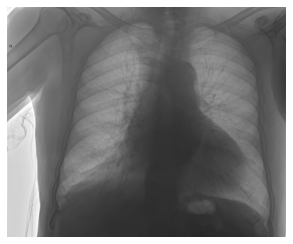

In [5]:
tdm.show()

Now, we are going to create a dataframe to store all the meta-data that we have loaded above

In [6]:
%%time
dicoms_df = pd.DataFrame.from_dicoms(items)

{'SpecificCharacterSet': 'ISO_IR 100', 'ImageType': 'ORIGINAL', 'SOPClassUID': '03a65300fa41', 'SOPInstanceUID': 'e00f9fe0cce5', 'StudyDate': '8fc8a9262642', 'StudyTime': 'd2263d63788b', 'AccessionNumber': '6035be0aeebb', 'Modality': 'CR', 'PatientName': '42eb77c05914', 'PatientID': '42eb77c05914', 'PatientSex': 'F', 'DeidentificationMethod': 'CTP Default', 'DeidentificationMethodCodeSequence': (0008, 0100) Code Value                          SH: '3'
(0008, 0102) Coding Scheme Designator            SH: 'XNAT'
(0008, 0103) Coding Scheme Version               SH: '1.0'
(0008, 0104) Code Meaning                        LO: 'XNAT DicomEdit 6 Script', 'BodyPartExamined': 'CHEST', 'ImagerPixelSpacing': "0.15", 'StudyInstanceUID': 'ae3e63d94c13', 'SeriesInstanceUID': '288554eb6182', 'StudyID': 'baa7fa82b663', 'SeriesNumber': "2", 'InstanceNumber': "1", 'SamplesPerPixel': 1, 'PhotometricInterpretation': 'MONOCHROME1', 'Rows': 2320, 'Columns': 2828, 'BitsAllocated': 16, 'BitsStored': 15, 'HighBi

/opt/conda/lib/python3.7/site-packages/pydicom/pixel_data_handlers/numpy_handler.py:341: UserWarning: The length of the pixel data in the dataset (13262360 bytes) indicates it contains excess padding. 216296 bytes will be removed from the end of the data
  warnings.warn(msg)


{'SpecificCharacterSet': 'ISO_IR 100', 'ImageType': 'DERIVED', 'SOPClassUID': '71228e4340de', 'SOPInstanceUID': 'a648b88334e7', 'StudyDate': 'c85f3de962de', 'StudyTime': '1f76bd014ed5', 'AccessionNumber': '61a297c3131b', 'Modality': 'DX', 'PatientName': 'b2155ab1f2e1', 'PatientID': 'b2155ab1f2e1', 'PatientSex': 'M', 'DeidentificationMethod': 'RSNA Covid-19 Dataset Default', 'DeidentificationMethodCodeSequence': (0008, 0100) Code Value                          SH: '113100'
(0008, 0102) Coding Scheme Designator            SH: 'DCM'
(0008, 0104) Code Meaning                        LO: 'Basic Application Confidentiality Profile', 'BodyPartExamined': 'CHEST', 'ImagerPixelSpacing': "0.125", 'StudyInstanceUID': '635679335416', 'SeriesInstanceUID': '37dff21d4fd4', 'StudyID': '55625fb42f3f', 'SeriesNumber': "1", 'InstanceNumber': "1", 'SamplesPerPixel': 1, 'PhotometricInterpretation': 'MONOCHROME2', 'Rows': 2590, 'Columns': 2993, 'BitsAllocated': 16, 'BitsStored': 12, 'HighBit': 11, 'PixelRepre

In [7]:
dicoms_df[:2]

,SpecificCharacterSet,ImageType,SOPClassUID,SOPInstanceUID,StudyDate,StudyTime,AccessionNumber,Modality,,PatientName,...,img_mean,img_std,img_pct_window,ImageType2,ImageType3,ImageType4,ImageType5,ImageType6,ImageType7,ImageType8
0,ISO_IR 100,ORIGINAL,71228e4340de,d8ba599611e5,837af68926b7,81c1a714dbda,c4aef4fc15a2,DX,GEIIS,"(1, d, f, 0, 3, 0, 4, 6, 2, 4, f, 5)",...,15830.900366,3066.972578,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ISO_IR 100,ORIGINAL,71228e4340de,29b23a11d1e4,f8a528b18394,55d5bf2dc87c,179cea9403ed,DX,NaN,"(c, 3, 3, 9, 2, f, 0, 6, a, 4, 0, 1)",...,2271.539958,1024.988986,0.033598,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# It is a time consuming process to load dicoms into a dataframe. 
#So, i pickle the dataframe to load with ease in future.
dicoms_df.shape
dicoms_df.to_pickle('./dicoms_df.pkl')

In [9]:
%%time 

dicom_dataframe = pd.read_pickle('./dicoms_df.pkl')
dicom_dataframe.shape #Just to demonstrate loading a .pkl into a dataframe

CPU times: user 1.06 s, sys: 78.8 ms, total: 1.14 s
Wall time: 1.14 s


(6334, 52)

In [10]:
dicom_dataframe.columns #Attributes that could help with further analysis in the future

Index(['SpecificCharacterSet', 'ImageType', 'SOPClassUID', 'SOPInstanceUID',
       'StudyDate', 'StudyTime', 'AccessionNumber', 'Modality', '',
       'PatientName', 'PatientID', 'PatientSex', 'DeidentificationMethod',
       'DeidentificationMethodCodeSequence', 'BodyPartExamined',
       'ImagerPixelSpacing', 'StudyInstanceUID', 'SeriesInstanceUID',
       'StudyID', 'SeriesNumber', 'InstanceNumber', 'SamplesPerPixel',
       'PhotometricInterpretation', 'Rows', 'Columns', 'BitsAllocated',
       'BitsStored', 'HighBit', 'PixelRepresentation', 'fname',
       'MultiImageType', 'ImageType1',
       'MultiDeidentificationMethodCodeSequence',
       'DeidentificationMethodCodeSequence1',
       'DeidentificationMethodCodeSequence2',
       'DeidentificationMethodCodeSequence3',
       'DeidentificationMethodCodeSequence4',
       'DeidentificationMethodCodeSequence5', 'MultiImagerPixelSpacing',
       'ImagerPixelSpacing1', 'img_min', 'img_max', 'img_mean', 'img_std',
       'img_pct_w